# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [2]:
df = pd.read_csv('Case Study - Transaction.csv', sep=';')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# **Data Cleansing**

In [3]:
# Mengecek Missing Value
df.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [4]:
# Melakukan groupby berdasarkan "customerID" dan agregasi data
df = df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Menghitung jumlah transaksi untuk setiap pelanggan
    'Qty': 'sum',              # Jumlah total qty untuk setiap pelanggan
    'TotalAmount': 'sum'       # Total jumlah amount untuk setiap pelanggan
}).reset_index()

# Mengganti nama kolom hasil agregasi
df.columns = ['CustomerID', 'TransactionCount', 'TotalQty', 'TotalAmount']
df

,CustomerID,TransactionCount,TotalQty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [5]:
# Mengubah kolom 'CustomerID' menjadi indeks
df.set_index('CustomerID', inplace=True)
df

,TransactionCount,TotalQty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


In [6]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 1 to 447
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   TransactionCount  447 non-null    int64
 1   TotalQty          447 non-null    int64
 2   TotalAmount       447 non-null    int64
dtypes: int64(3)
memory usage: 14.0 KB


# **Check Data Distribution**

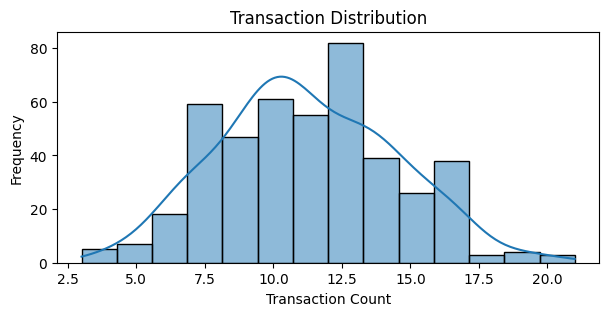

In [7]:
# Transaction Distribution

plt.figure(figsize=(7, 3))
sns.histplot(df["TransactionCount"], kde = True)
plt.title("Transaction Distribution")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.show()

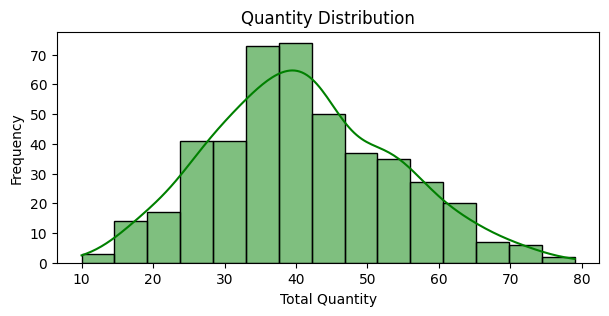

In [8]:
# Quantity Distribution

plt.figure(figsize=(7, 3))
sns.histplot(df["TotalQty"], color = "green", kde = True)
plt.title("Quantity Distribution")
plt.xlabel("Total Quantity")
plt.ylabel("Frequency")
plt.show()

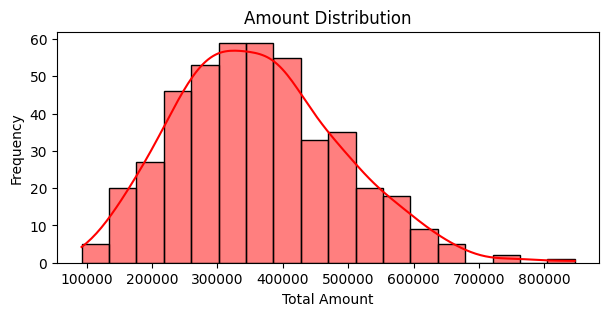

In [9]:
# Amount Distribution

plt.figure(figsize=(7, 3))
sns.histplot(df["TotalAmount"], color = "red", kde = True)
plt.title("Amount Distribution")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

# **Build Model**

In [10]:
# Mencari nilai jumlah cluster yang paling optimal

wcss = []
for i in range(1,21):
  score = KMeans(n_clusters=i).fit(df).score(df)
  wcss.append(score)
print(wcss)

[-6928031859602.738, -2434662706463.3955, -1233033389389.963, -776645420224.5262, -504081360603.5856, -381440455217.2973, -279699226282.4569, -213013433400.03278, -171802220886.23285, -136402527779.36087, -105423470390.922, -89103787263.62982, -75951634467.05843, -65462675662.256744, -57076792157.71135, -49101610161.6064, -43556263525.653595, -39052459177.62354, -32888509654.56778, -28952237583.656555]


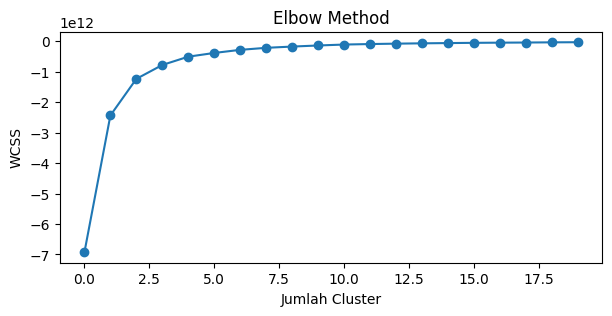

In [13]:
# Visualisasi dengan Elbow Method

plt.figure(figsize=(7,3))
plt.plot(wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()

In [12]:
# Cluster yang paling optimal berjumlah 3

model = KMeans(n_clusters=3)
model.fit(df)
label = model.labels_
centroid = model.cluster_centers_

# **Clustering Visualization**

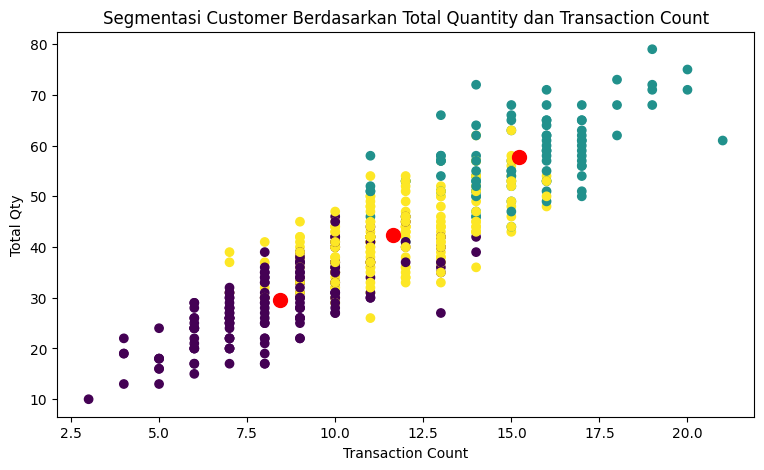

In [16]:
# Segmentasi Customer Berdasarkan Total Quantity dan Transaction Count

plt.figure(figsize=(9, 5))
plt.scatter(x=df["TransactionCount"], y=df["TotalQty"], c=label)
plt.scatter(x=centroid[:,0], y=centroid[:,1], s=100, c="red")
plt.title("Segmentasi Customer Berdasarkan Total Quantity dan Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("Total Qty")
plt.show()

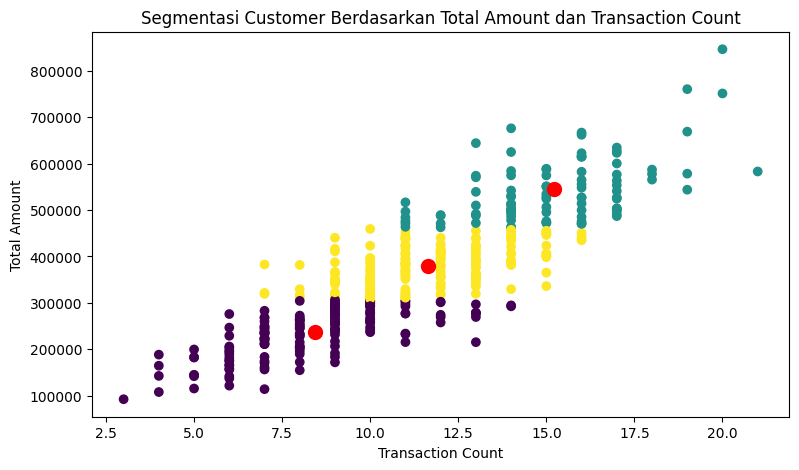

In [17]:
# Segmentasi Customer Berdasarkan Total Amount dan Transaction Count

plt.figure(figsize=(9, 5))
plt.scatter(x=df["TransactionCount"], y=df["TotalAmount"], c=label)
plt.scatter(x=centroid[:,0], y=centroid[:,2], s=100, c="red")
plt.title("Segmentasi Customer Berdasarkan Total Amount dan Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("Total Amount")
plt.show()

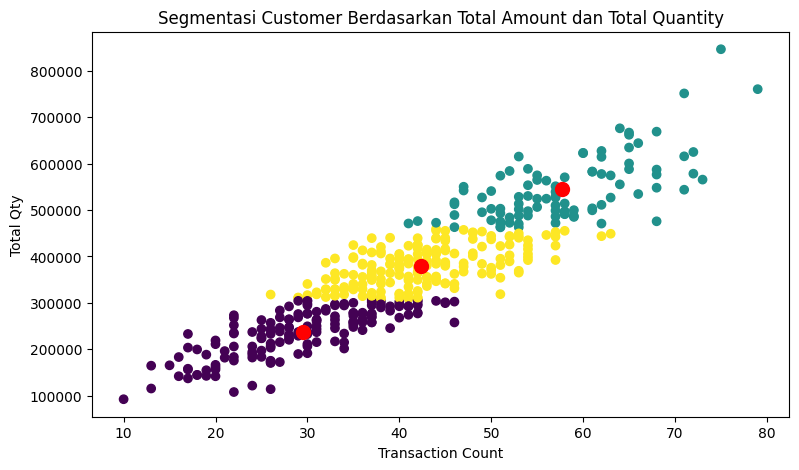

In [18]:
# Segmentasi Customer Berdasarkan Total Amount dan Total Quantity

plt.figure(figsize=(9, 5))
plt.scatter(x=df["TotalQty"], y=df["TotalAmount"], c=label)
plt.scatter(x=centroid[:,1], y=centroid[:,2], s=100, c="red")
plt.title("Segmentasi Customer Berdasarkan Total Amount dan Total Quantity")
plt.xlabel("Transaction Count")
plt.ylabel("Total Qty")
plt.show()